<a href="https://colab.research.google.com/github/caverar/TIA_2022/blob/yolo/yoloColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOV5 Test for ANPR

## Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/.shortcut-targets-by-id/1edgNojlLOleZ4zhRd2ZrFPKL2WDJd3Us/Colab

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1edgNojlLOleZ4zhRd2ZrFPKL2WDJd3Us/Colab


Download YOLOV5

In [ ]:
#!git clone https://github.com/ultralytics/yolov5  # clone
!pip install -r yolov5/requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!cat ./coco.yaml

train: ../dataset/images/train/
val: ../dataset/images/val/


# Classes
nc: 1  # number of classes
names: [ "plate" ]  # class names




In [ ]:
!python ./yolov5/train.py --img 480 --batch-size -1 --epochs 50 --data coco.yaml --weights yolov5x.pt --cache


train: weights=yolov5x.pt, cfg=, data=coco.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=-1, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [ ]:
import torch

path = "/content/gdrive/.shortcut-targets-by-id/1edgNojlLOleZ4zhRd2ZrFPKL2WDJd3Us/Colab/"

# Model
model = torch.hub.load('yolov5', 'custom', path=path+"yolov5/runs/train/exp5/weights/best.pt", source='local')


YOLOv5 🚀 v6.2-249-gff6e6e3 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


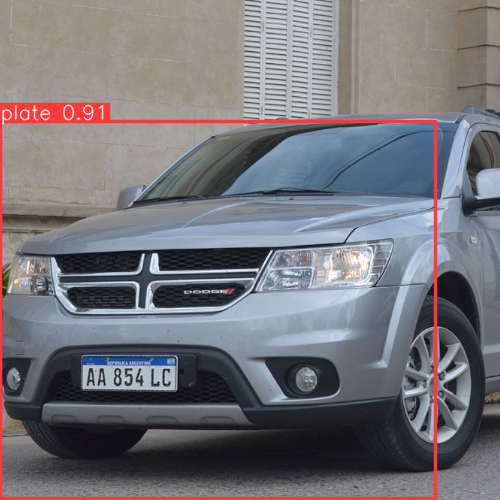

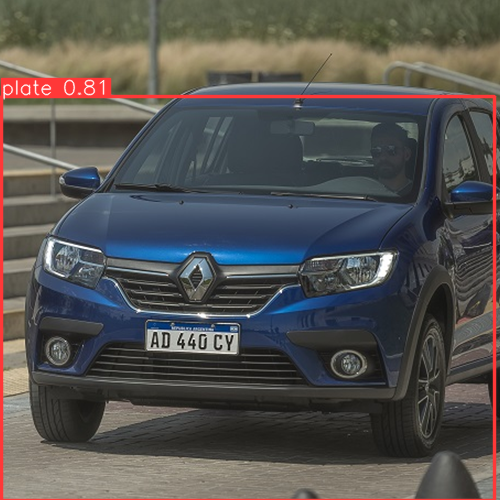

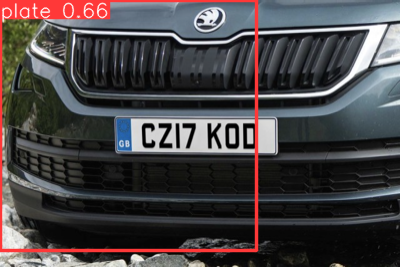

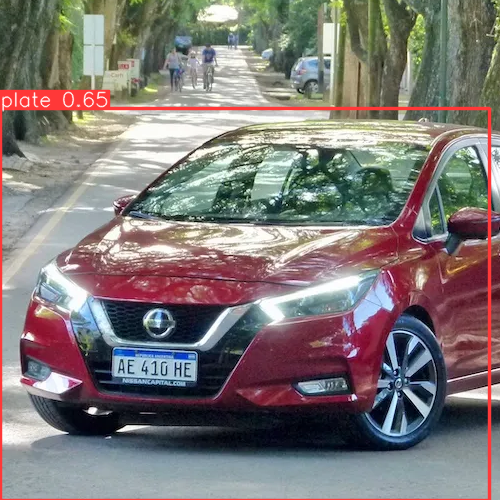

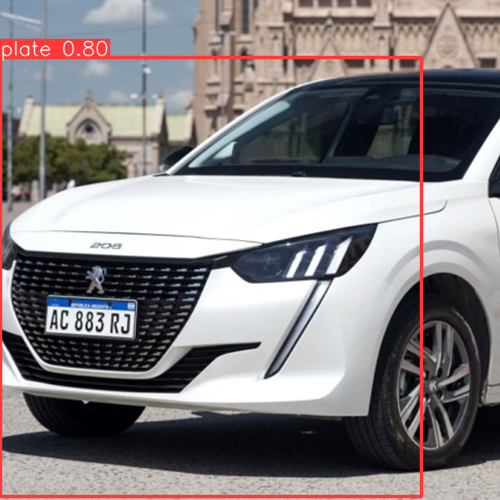

In [ ]:
from glob import glob
import cv2
from random import sample

image_paths = glob(path+'own/plates/*.png', recursive=True)


for ip in sample(image_paths,5):
    image = cv2.imread(ip)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model(image, size=480)
    results.show()